## Importing Data via Yahoo Finance

Installing the yfinance package, selecting the downloader connected with the Yahoo Fiannce API.

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import os

Downloaded the data and saved it as a pandas DataFrame.

In [3]:
initial_data = yf.download("NFLX ^VIX", start="2020-10-02", end="2021-10-02")

[*********************100%***********************]  2 of 2 completed


In [4]:
initial_data.head()

Adj Close                  Close                   High  \
                  NFLX       ^VIX        NFLX       ^VIX        NFLX   
Date                                                                   
2020-10-01  527.510010  26.700001  527.510010  26.700001  529.549988   
2020-10-02  503.059998  27.629999  503.059998  27.629999  526.369995   
2020-10-05  520.650024  27.959999  520.650024  27.959999  520.989990   
2020-10-06  505.869995  29.480000  505.869995  29.480000  521.820007   
2020-10-07  534.659973  28.059999  534.659973  28.059999  536.489990   

                              Low                   Open              Volume  \
                 ^VIX        NFLX       ^VIX        NFLX       ^VIX     NFLX   
Date                                                                           
2020-10-01  27.110001  503.600006  25.330000  506.029999  25.780001  8153700   
2020-10-02  29.900000  502.700012  26.930000  516.429993  28.870001  6071200   
2020-10-05  29.690001  501.700012  27.270000  506.799988  29.520000  4088100   
2020-10-06  30.000000  504.160004  26.010000  518.719971  28.049999  4199000   
2020-10-07  29.760000  515.820007  27.940001  518.000000  29.260000  7988700   

                 
           ^VIX  
Date             
2020-10-01    0  
2020-10-02    0  
2020-10-05    0  
2020-10-06    0  
2020-10-07    0

In [5]:
initial_data['Adj Close'].head()

,NFLX,^VIX
Date,,
2020-10-01,527.510010,26.700001
2020-10-02,503.059998,27.629999
2020-10-05,520.650024,27.959999
2020-10-06,505.869995,29.480000
2020-10-07,534.659973,28.059999


Setting the Adj Closed data as a new DataFrame.

In [6]:
data =  initial_data['Adj Close']
data.describe()

,NFLX,^VIX
count,253.000000,253.000000
mean,525.057746,21.267747
std,30.718934,4.612315
min,470.500000,15.070000
25%,501.769989,17.690001
50%,519.780029,20.790001
75%,543.710022,23.250000
max,613.150024,40.279999


In [7]:
data.tail()

,NFLX,^VIX
Date,,
2021-09-27,592.640015,18.760000
2021-09-28,583.849976,23.250000
2021-09-29,599.059998,22.559999
2021-09-30,610.340027,23.139999
2021-10-01,613.150024,21.100000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

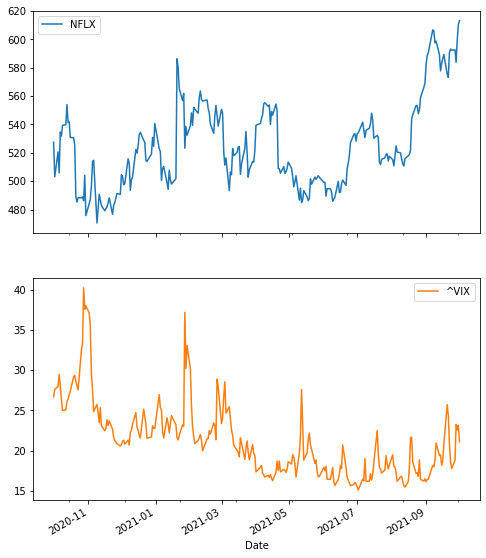

In [8]:
data.plot(figsize=(8, 10), subplots=True)

#### Data Description

In [9]:
data.diff().describe().round(2)

,NFLX,^VIX
count,252.00,252.00
mean,0.34,-0.02
std,11.40,2.01
min,-44.23,-7.00
25%,-4.38,-0.95
50%,0.96,-0.22
75%,5.47,0.81
max,84.57,14.19


#### Summary Statistics

In [10]:
data.describe().round(2)

,NFLX,^VIX
count,253.00,253.00
mean,525.06,21.27
std,30.72,4.61
min,470.50,15.07
25%,501.77,17.69
50%,519.78,20.79
75%,543.71,23.25
max,613.15,40.28


#### Changes Over Time

In [11]:
data.pct_change().round(4).head()

,NFLX,^VIX
Date,,
2020-10-01,NaN,NaN
2020-10-02,-0.0463,0.0348
2020-10-05,0.0350,0.0119
2020-10-06,-0.0284,0.0544
2020-10-07,0.0569,-0.0482


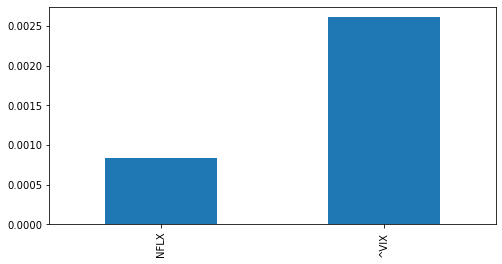

In [12]:
data.pct_change().mean().plot(kind='bar', figsize=(8, 4)); 

In [13]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,NFLX,^VIX
Date,,
2020-10-01,NaN,NaN
2020-10-02,-0.0475,0.0342
2020-10-05,0.0344,0.0119
2020-10-06,-0.0288,0.0529
2020-10-07,0.0554,-0.0494


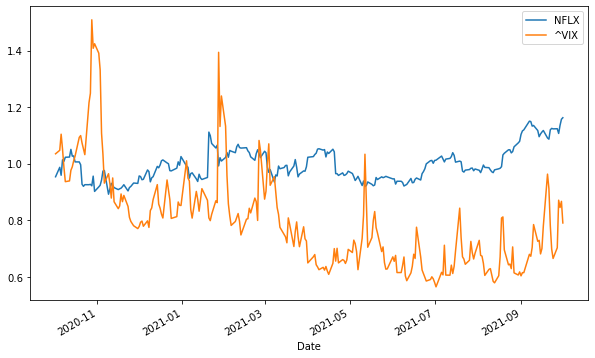

In [14]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

#### Resampling

This takes the form of downsampling, meaning, A tick data series is resampled to one-minute intervals.

In [15]:
data.resample('1w', label='right').last().head()

,NFLX,^VIX
Date,,
2020-10-04,503.059998,27.629999
2020-10-11,539.440002,25.000000
2020-10-18,530.789978,27.410000
2020-10-25,488.279999,27.549999
2020-11-01,475.739990,38.020000


<AxesSubplot:xlabel='Date'>

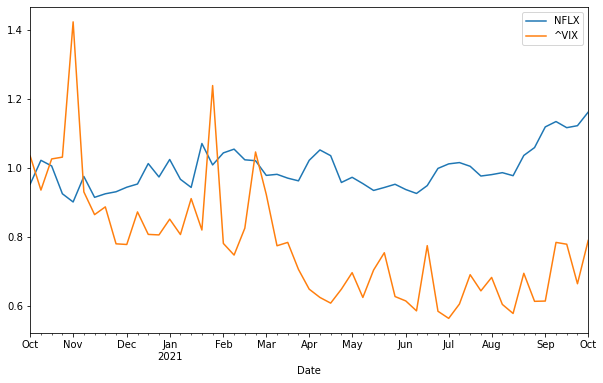

In [16]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

In [17]:
data.resample('1m', label='right').last().head()

,NFLX,^VIX
Date,,
2020-10-31,475.739990,38.020000
2020-11-30,490.700012,20.570000
2020-12-31,540.729980,22.750000
2021-01-31,532.390015,33.090000
2021-02-28,538.849976,27.950001


<AxesSubplot:xlabel='Date'>

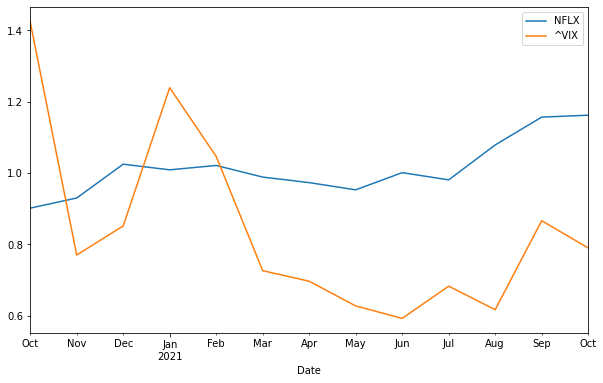

In [18]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

#### Rolling Statistics

This section works with a single financial time series.

In [19]:
sym = 'NFLX'
NFLX_data = pd.DataFrame(data[sym]).dropna()
NFLX_data.tail()

,NFLX
Date,
2021-09-27,592.640015
2021-09-28,583.849976
2021-09-29,599.059998
2021-09-30,610.340027
2021-10-01,613.150024


In [20]:
NFLX_data.head()

,NFLX
Date,
2020-10-01,527.510010
2020-10-02,503.059998
2020-10-05,520.650024
2020-10-06,505.869995
2020-10-07,534.659973


In [21]:
window = 10
NFLX_data['min'] = data[sym].rolling(window=window).min()
NFLX_data['mean'] = data[sym].rolling(window=window).mean()
NFLX_data['std'] = data[sym].rolling(window=window).std()
NFLX_data['median'] = data[sym].rolling(window=window).median()
NFLX_data['max'] = data[sym].rolling(window=window).max()
NFLX_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
NFLX_data.dropna().head()

,NFLX,min,mean,std,median,max,ewma
Date,,,,,,,
2020-10-14,541.450012,503.059998,529.833002,16.066063,533.224976,554.090027,543.678366
2020-10-15,541.940002,503.059998,531.276001,16.477008,537.049988,554.090027,542.374593
2020-10-16,530.789978,505.869995,534.048999,13.210367,537.049988,554.090027,533.686131
2020-10-19,530.719971,505.869995,535.055994,12.436656,537.049988,554.090027,531.461511
2020-10-20,525.419983,525.419983,537.010992,8.129806,537.049988,554.090027,526.930365


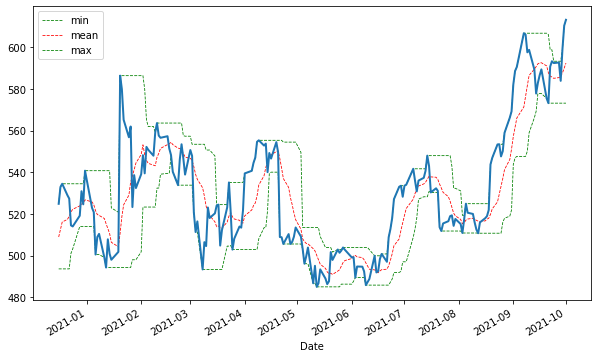

In [22]:
ax = NFLX_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [23]:
NFLX_data['SMA1'] = data[sym].rolling(window=20).mean()
NFLX_data['SMA2'] = data[sym].rolling(window=60).mean()
NFLX_data[[sym, 'SMA1', 'SMA2']].tail()

,NFLX,SMA1,SMA2
Date,,,
2021-09-27,592.640015,587.441000,548.220999
2021-09-28,583.849976,588.324500,549.052166
2021-09-29,599.059998,589.817999,550.009165
2021-09-30,610.340027,591.231500,551.248832
2021-10-01,613.150024,592.461502,552.621999


<AxesSubplot:xlabel='Date'>

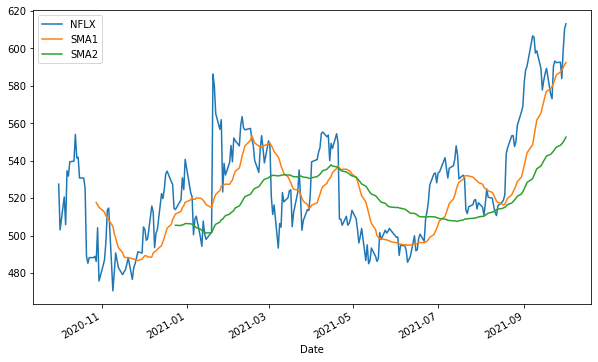

In [24]:
NFLX_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

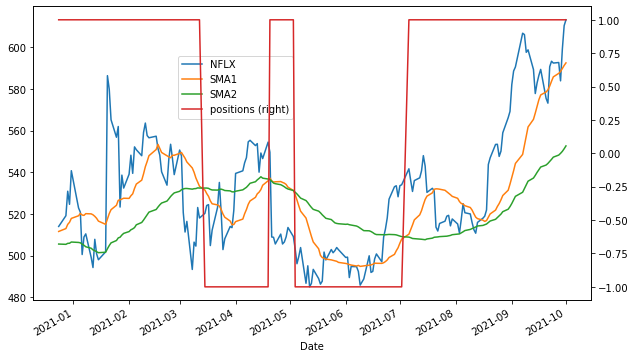

In [25]:
NFLX_data.dropna(inplace=True)
NFLX_data['positions'] = np.where(NFLX_data['SMA1'] > NFLX_data['SMA2'],1,-1)
ax = NFLX_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

#### Finding Volatility

In [26]:
NFLX= data['NFLX']
vix= data['^VIX']

In [27]:
lr = np.log(NFLX / NFLX.shift(1))

In [28]:
vol=np.sqrt(252)*lr.std()
print('The annualised volatility is',round(vol*100,2),'%')

The annualised volatility is 34.47 %


In [29]:
vix=vix[-1]

In [30]:
print('The market volatility is',round(vix,2),'%')

The market volatility is 21.1 %


#### Methodology

The Binomial options pricing model approach has been widely used since it is able to handle a variety of conditions for which other models cannot easily be applied. This is largely because the BOPM is based on the description of an underlying instrument over a period of time rather than a single point.

DATA INPUT

Taking the data to create the models.

In [31]:
S0 = 617.77              # spot stock price
K = 550.0                # strike
T = 1.0                  # maturity 
r = .0025                # risk free rate 
sig = 0.3447             # diffusion coefficient or volatility
N = 3                    # number of periods or number of time steps  
payoff = "call"          # payoff 

Creating the Binominal Price Tree

The tree of prices is produced by working forward from valuation date to expiration.

At each step, it is assumed that the underlying instrument will move up or down by a specific factor, per step of the tree (where, by definition, u ≥ 1 and 0 < d ≤ 1 ).

In [32]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u  

In [33]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [34]:
S

array([[ 617.77      ,  753.8013394 ,  919.7864242 , 1122.32099085],
       [   0.        ,  506.28693922,  617.77      ,  753.8013394 ],
       [   0.        ,    0.        ,  414.9221633 ,  506.28693922],
       [   0.        ,    0.        ,    0.        ,  340.04511723]])

In [35]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4524911827299984

#### Finding option value at each final node¶

In [36]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
V

array([[  0.        ,   0.        ,   0.        , 572.32099085],
       [  0.        ,   0.        ,   0.        , 203.8013394 ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

#### Finding Optional Value at earlier nodes

European Option

In [37]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[121.25947043, 217.79910654, 370.24456661, 572.32099085],
       [  0.        ,  41.65848306,  92.14149253, 203.8013394 ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [38]:
print('European ' + payoff, str( V[0,0]))

European call 121.25947043027345


#### Black-Scholes Model

Non-Dividend Paying Options

In [39]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return option_value

In [40]:
euro_option_bs(617.77, 550, 1, 0.0025, 0.3447, 'call')

119.00737911114595

In [41]:
S = np.linspace(400,800,44)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 550, 1, 0.0025, 0.3447, 'call')

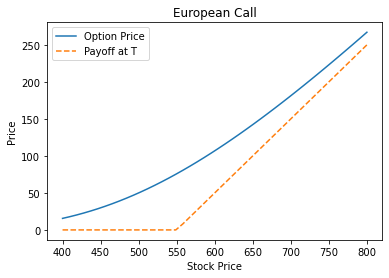

In [42]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-550,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

#### Option Trading 

Checking if the Black Scholes correctly predicted the market value of the options or not.


In [43]:
NFLX = yf.Ticker('NFLX')
opt = NFLX.option_chain('2021-12-10')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,NFLX211210C00460000,2021-11-12 17:04:27,460.0,216.00,140.30,144.60,0.00,0.0,1.0,1,0.957032,True,REGULAR,USD
1,NFLX211210C00470000,2021-12-03 15:23:02,470.0,135.85,129.75,135.70,135.85,NaN,2.0,1,0.975586,True,REGULAR,USD
2,NFLX211210C00475000,2021-11-29 14:30:00,475.0,190.18,124.75,129.90,190.18,NaN,NaN,1,0.800783,True,REGULAR,USD
3,NFLX211210C00480000,2021-12-03 20:54:50,480.0,118.35,119.75,125.70,118.35,NaN,1.0,0,0.903810,True,REGULAR,USD
4,NFLX211210C00490000,2021-11-30 16:24:03,490.0,170.46,109.70,115.75,0.00,0.0,17.0,66,0.833009,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NFLX211210C00870000,2021-11-30 20:55:27,870.0,0.08,0.00,0.15,0.08,NaN,NaN,10,1.029302,False,REGULAR,USD
66,NFLX211210C00880000,2021-11-22 15:32:42,880.0,0.26,0.00,0.27,0.00,0.0,NaN,1,1.121098,False,REGULAR,USD
67,NFLX211210C00890000,2021-11-22 16:42:28,890.0,0.35,0.00,0.26,0.00,0.0,1.0,20,1.146489,False,REGULAR,USD
68,NFLX211210C00900000,2021-11-26 16:31:37,900.0,0.19,0.00,0.26,0.00,0.0,2.0,2,1.174809,False,REGULAR,USD


In [44]:
data = yf.download("NFLX", start="2020-10-20", end="2021-10-02")

[*********************100%***********************]  1 of 1 completed


In [45]:
data['Adj Close']

Date
2020-10-19    530.719971
2020-10-20    525.419983
2020-10-21    489.049988
2020-10-22    485.230011
2020-10-23    488.279999
                 ...    
2021-09-27    592.640015
2021-09-28    583.849976
2021-09-29    599.059998
2021-09-30    610.340027
2021-10-01    613.150024
Name: Adj Close, Length: 241, dtype: float64

In [46]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1
r = 0.0025
q = 0.00
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.33919276988416075

#### Greeks

#### Delta

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [47]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    return delta

In [48]:
delta(617.77, 550, 1, 0.0025, 0.00, 0.3447, 'call')

0.6973177049632189

In [49]:
S = np.linspace(400,800,44)
Delta_Call = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 550, 1, 0.0025, 0.00, 0.3447, 'call')

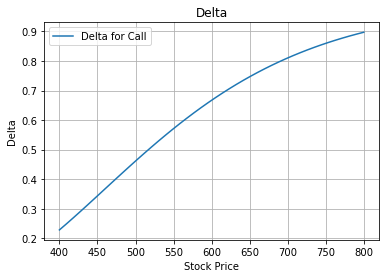

In [50]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

Surface of Delta

In [51]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
        
    return delta

In [97]:
S = np.linspace(400,800,51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 550, T[i], 0.0025, 0.00, 0.3447, 'call')

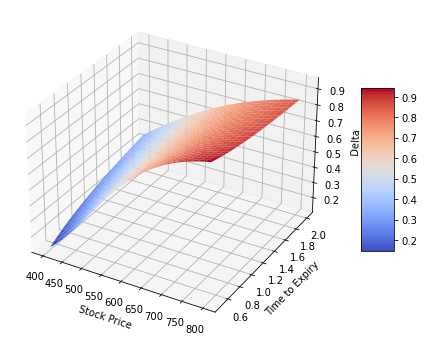

In [98]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [113]:
d = delta(617.77, 550, 1, 0.0025, 0.00, 0.3447, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.6973 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.6973 .


#### Gamma

In [54]:
import numpy as np

In [55]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [56]:
gamma(617.77, 550, 1, 0.0025, 0.00, 0.3447, 'call')

0.0016393357705339717

In [57]:
S = np.linspace(400,800,44)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 550, 1, 0.0025, 0.00, 0.3447, 'call')

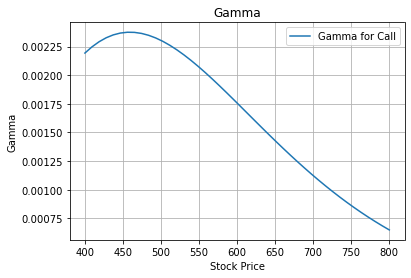

In [58]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

Surface of Gamma

In [59]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [99]:
S = np.linspace(400, 800, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 550, T[i], 0.0025, 0.00, 0.3447, 'call')

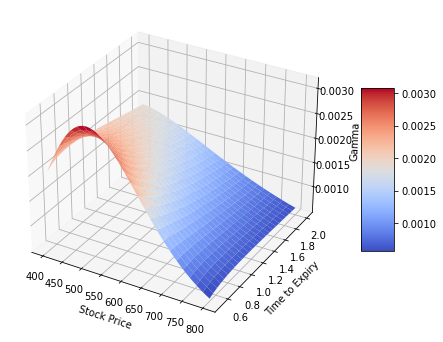

In [100]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Speed

In [62]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    return speed

In [63]:
speed(617.77, 550, 1, 0.0025, 0.00, 0.3447, 'call')

-6.6314028477870406e-06

In [65]:
S = np.linspace(400,800,44)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 550, 1, 0.0025, 0.00, 0.3447, 'call')

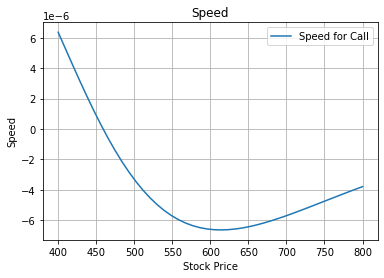

In [66]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

Surface of Speed


In [67]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [101]:
S = np.linspace(400, 800, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 550, T[i], 0.0025, 0.00, 0.3447, 'call')

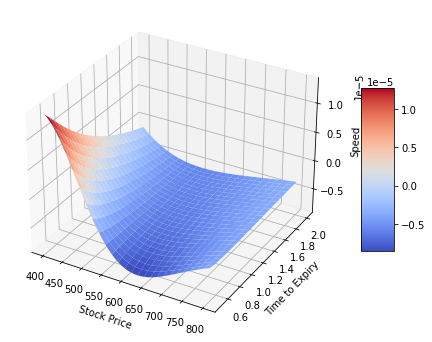

In [102]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Theta

In [70]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return theta

In [71]:
theta(617.77, 550, 1, 0.0025, 0.00, 0.3447, 'call')

37.94785775560024

In [72]:
T = np.linspace(400,800,44)
Theta_Call = np.zeros((len(T),1))

for i in range(len(T)):
    Theta_Call [i] = theta(617.77, 550, T[i], 0.0025, 0.00, 0.3447, 'call')
    

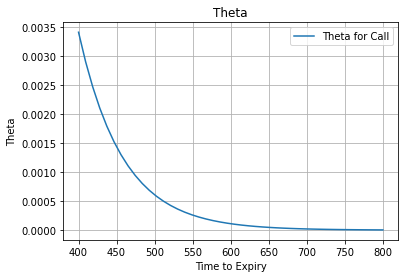

In [73]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

Surface of Theta

In [74]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [103]:
S = np.linspace(400, 800, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 550, T[i], 0.0025, 0.00, 0.3447, 'call')

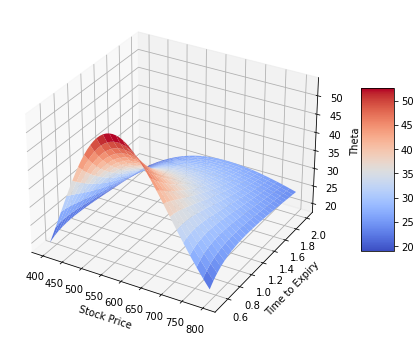

In [104]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Rho

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [77]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return rho

In [78]:
rho(617.77, 550, 1, 0.0025, 0.00, 0.3447, 'call')

311.77457948398177

In [79]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))

for i in range(len(r)):
    Rho_Call [i] = rho(617.77, 550, 1, r[i], 0.00, 0.3447, 'call')
    

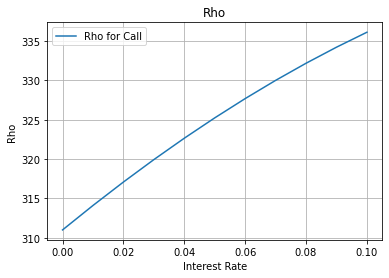

In [80]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

Surface of Rho

In [81]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [105]:
S = np.linspace(400, 800, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 550, T[i], 0.0025, 0.00, 0.3447, 'call')

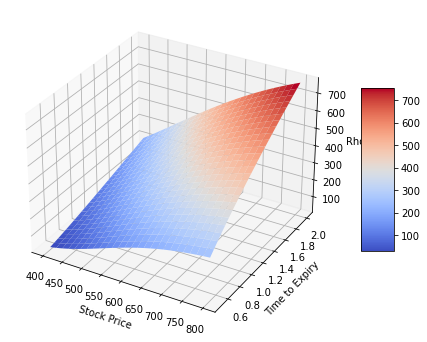

In [106]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Vega

Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [84]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [85]:
vega(617.77, 550, 1, 0.0025, 0.00, 0.3447, 'call')

215.6566365354818

In [86]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(617.77, 550, 1, 0.0025, 0.00, vol[i], 'call')

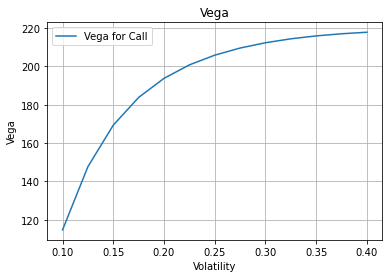

In [87]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

#### Surface of Vega

In [88]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [107]:
S = np.linspace(400, 800, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 550, T[i], 0.0025, 0.00, 0.3447, 'call')

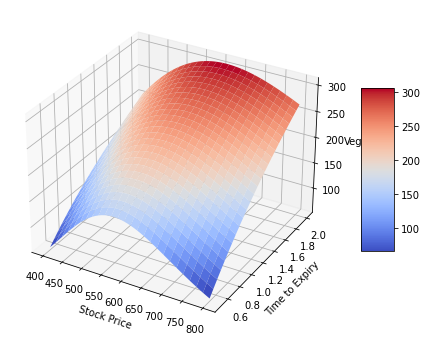

In [108]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [110]:
v = vega(617.77, 550, 1, 0.0025, 0.00, 0.3447, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 215.6566 . If the volatility increases 1%, then the value of the option will increase $ 2.156566 .
